In [1]:
#@title IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime,timedelta
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1, accuracy_score as acc, classification_report, make_scorer, confusion_matrix
from sklearn.dummy import DummyClassifier

from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install fsspec

In [3]:
#pip install openpyxl

In [2]:
import multiprocessing

multiprocessing.cpu_count()

20

### Importing the dataset

The Preprocessing_of_data downloads the raw data from the source (GitHub) and do the necessary processes to make it a processed data.

In [ ]:
for i in range(1,36):
    globals()['df%s'%i] = preprocessing_of_data()[i-1]

The processed dataset for the 35 participants has been saved into a variable df1 - df35

Within the loop, the `globals()` function is used to dynamically access and update variables in the global namespace. Specifically, the globals() function is used to get a reference to a variable with a specific name, based on the current value of i. Using the string format syntax `df%s` for example, when i is 1, the code will access the variable named df1.

If you want to see the processing code, uncomment the code below. *Make sure the .py file and the jupyter file are in the same folder*

In [ ]:
#%load ./Preprocessing_code_no_def.py

### This is optional

In [ ]:
If you need to save the data into a csv file, use the code between. Change the directory to yours.

In [ ]:
for i in range(start, end):
    if i < 10:
        df = 'M:/Decision/DF/df_Stress_S0' + str(i) + '.csv'
    else:
        df = 'M:/Decision/DF/df_Stress_S' + str(i) + '.csv'
    globals()['df%s'%i]= pd.read_csv(df)

To import the csv file back for use via pandas

In [ ]:
for i in range(start, end):
    if i < 10:
        globals()['s_id%s'%i] = 'S0' + str(i)
    else:
        globals()['s_id%s'%i] = 'S' + str(i)
    path = 'M:/Decision/DF/df_Stress_' + globals()['s_id%s'%i] + '.csv'
    globals()['df%s'%i].to_csv(path, index=False)

## Analysis

Generating a random number to choose the participant data that would be grouped for training

In [6]:
import random

def rand_df():
    random.seed(123)
    df_num = []
    for i in range(52):
        n = random.randint(1,35)
        if n not in df_num:
            df_num.append(n)
    return df_num

In [38]:
print(sorted(rand_df()))

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35]


Using the remaining data for testing

In [7]:
l = sorted(rand_df())
num = []
def check():
    for i in range(1,36):
        if i not in l:
            num.append(i)
    return sorted(num)

check()

[8, 12, 13, 15, 23, 24, 30]

df1, df2, df3, df4, df5, df6, df7, df9, df10, df11, df14, df16, df17, df18, df19, df20, df21, df22, df25, df26, df27, df28, df29, df31, df32, df33, df34, df35

Making a single (grouped) dataframe by combining the data of the participants

In [30]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df9, df10, df11, df14, df16, df17, df18, df19, df20, df21, df22, df25, 
                df26, df27, df28, df29, df31, df32, df33, df34, df35], axis = 0)

Getting the data ready

In [31]:
x_train, y_train = df.drop(['Person','Label'], axis=1), df['Label']

In [32]:
x_df8_test, y_df8_test = df8.drop(['Person','Label'], axis=1), df8['Label']
x_df12_test, y_df12_test = df12.drop(['Person','Label'], axis=1), df12['Label']
x_df13_test, y_df13_test = df13.drop(['Person','Label'], axis=1), df13['Label']
x_df15_test, y_df15_test = df15.drop(['Person','Label'], axis=1), df15['Label']
x_df23_test, y_df23_test = df23.drop(['Person','Label'], axis=1), df23['Label']
x_df24_test, y_df24_test = df24.drop(['Person','Label'], axis=1), df24['Label']
x_df30_test, y_df30_test = df30.drop(['Person','Label'], axis=1), df30['Label']

In [33]:
print('length of S8 dataframe =', len(df8))
print('length of S12 dataframe =', len(df12))
print('length of S13 dataframe =', len(df13))
print('length of S15 dataframe =', len(df15))
print('length of S23 dataframe =', len(df23))
print('length of S24 dataframe =', len(df24))
print('length of S30 dataframe =', len(df30))

length of S8 dataframe = 9786
length of S12 dataframe = 10320
length of S13 dataframe = 10529
length of S15 dataframe = 10320
length of S23 dataframe = 9830
length of S24 dataframe = 10150
length of S30 dataframe = 10320


## Random Forest

Creating a Random Forest Model and fitting it to the grouped data.

In [35]:
rf = RandomForestClassifier(n_estimators=200, max_depth = 6, random_state=42)
rf.fit(x_train, y_train)

rf_cv_tr_score = cross_val_score(rf, x_train, y_train, cv=5, scoring=make_scorer(acc))
print('Cross-validation score on training data', round(rf_cv_tr_score.mean(),2))

Cross-validation score on training data 0.61


The Cross validation of the model on test data

In [37]:
cv_rf_s8 = RF(x_df8_test, y_df8_test)
cv_rf_s12 = RF(x_df12_test, y_df12_test)
cv_rf_s13 = RF(x_df13_test, y_df13_test)
cv_rf_s15 = RF(x_df15_test, y_df15_test)
cv_rf_s23 = RF(x_df23_test, y_df23_test)
cv_rf_s24 = RF(x_df24_test, y_df24_test)
cv_rf_s30 = RF(x_df30_test, y_df30_test)

Accuracy of the model on participant data 0.5972818311874106 

              precision    recall  f1-score   support

      Normal       0.85      0.41      0.55      5946
      Stress       0.49      0.89      0.63      3840

    accuracy                           0.60      9786
   macro avg       0.67      0.65      0.59      9786
weighted avg       0.71      0.60      0.58      9786

Cross-validation score on Participant data 0.64

 

Accuracy of the model on participant data 0.4010658914728682 

              precision    recall  f1-score   support

      Normal       0.51      0.18      0.27      6240
      Stress       0.37      0.74      0.49      4080

    accuracy                           0.40     10320
   macro avg       0.44      0.46      0.38     10320
weighted avg       0.46      0.40      0.36     10320

Cross-validation score on Participant data 0.82

 

Accuracy of the model on participant data 0.5621616487795612 

              precision    recall  f1-score   support

Printing out the cross Validation score of the RF model on the test data

In [38]:
print('CV of S8 =', cv_rf_s8,
       '\nCV of S12 =', cv_rf_s12,
       '\nCV of S13 =:', cv_rf_s13,
       '\nCV of S15 =:', cv_rf_s15,
       '\nCV of S23 =:', cv_rf_s23,
       '\nCV of S24 =:', cv_rf_s24,
       '\nCV of S30 =:', cv_rf_s30,
      )

CV of S8 = 0.64 
CV of S12 = 0.82 
CV of S13 =: 0.78 
CV of S15 =: 0.74 
CV of S23 =: 0.76 
CV of S24 =: 0.7 
CV of S30 =: 0.6


The Accurracy of the RF model on the test data

In [39]:
print('Random Forest Accuracy on Participants')
print('S8 =', round(acc(df8['Label'], rf.predict(df8.drop(['Person','Label'], axis=1))),2))
print('S12 =', round(acc(df12['Label'], rf.predict(df12.drop(['Person','Label'], axis=1))),2))
print('S13 =', round(acc(df13['Label'], (rf.predict(df13.drop(['Person','Label'], axis=1)))),2))
print('S15 =', round(acc(df15['Label'], rf.predict(df15.drop(['Person','Label'], axis=1))),2))
print('S23 =', round(acc(df23['Label'], rf.predict(df23.drop(['Person','Label'], axis=1))),2))
print('S24 =', round(acc(df24['Label'], (rf.predict(df24.drop(['Person','Label'], axis=1)))),2))
print('S30 =', round(acc(df30['Label'], rf.predict(df30.drop(['Person','Label'], axis=1))),2))

Random Forest Accuracy on Participants
S8 = 0.6
S12 = 0.4
S13 = 0.56
S15 = 0.65
S23 = 0.71
S24 = 0.7
S30 = 0.73


Printing out the False Negavtive of the RF Model on the test data

In [40]:
print('The FN of S8 =', confusion_matrix(df8['Label'], rf.predict(df8.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S12 =', confusion_matrix(df12['Label'], rf.predict(df12.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S13 =', confusion_matrix(df13['Label'], rf.predict(df13.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S15 =', confusion_matrix(df15['Label'], rf.predict(df15.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S23 =', confusion_matrix(df23['Label'], rf.predict(df23.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S24 =', confusion_matrix(df24['Label'], rf.predict(df24.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S30 =', confusion_matrix(df30['Label'], rf.predict(df30.drop(['Person','Label'], axis=1)))[1][0])

The FN of S8 = 421
The FN of S12 = 1062
The FN of S13 = 3011
The FN of S15 = 3004
The FN of S23 = 2771
The FN of S24 = 1937
The FN of S30 = 2768


## Logistics Regression

Creating a Logistics Regression Model and fitting it to the grouped data.

In [41]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

lr_cv_tr_score = cross_val_score(lr, x_train, y_train, cv=5, scoring=make_scorer(acc))
print('Cross-validation score on training data', round(lr_cv_tr_score.mean(),2))

Cross-validation score on training data 0.59


Tthe cross Validation score of the LR model on the test data

In [43]:
cv_lr_s8 = LR(x_df8_test, y_df8_test)
cv_lr_s12 = LR(x_df12_test, y_df12_test)
cv_lr_s13 = LR(x_df13_test, y_df13_test)
cv_lr_s15 = LR(x_df15_test, y_df15_test)
cv_lr_s23 = LR(x_df23_test, y_df23_test)
cv_lr_s24 = LR(x_df24_test, y_df24_test)
cv_lr_s30 = LR(x_df30_test, y_df30_test)

Accuracy of the model on participant data 0.6076026977314531 

              precision    recall  f1-score   support

      Normal       0.61      1.00      0.76      5946
      Stress       0.00      0.00      0.00      3840

    accuracy                           0.61      9786
   macro avg       0.30      0.50      0.38      9786
weighted avg       0.37      0.61      0.46      9786

Cross-validation score on Participant data 0.6

 

Accuracy of the model on participant data 0.4873062015503876 

              precision    recall  f1-score   support

      Normal       0.72      0.25      0.37      6240
      Stress       0.43      0.85      0.57      4080

    accuracy                           0.49     10320
   macro avg       0.57      0.55      0.47     10320
weighted avg       0.60      0.49      0.45     10320

Cross-validation score on Participant data 0.8

 

Accuracy of the model on participant data 0.5648209706524836 

              precision    recall  f1-score   support



The Cross validation score of the LR model on test data

In [44]:
print('CV of S8 =', cv_lr_s8,
       '\nCV of S12 =', cv_lr_s12,
       '\nCV of S13 =:', cv_lr_s13,
       '\nCV of S15 =:', cv_lr_s15,
       '\nCV of S23 =:', cv_lr_s23,
       '\nCV of S24 =:', cv_lr_s24,
       '\nCV of S30 =:', cv_lr_s30,
      )

CV of S8 = 0.6 
CV of S12 = 0.8 
CV of S13 =: 0.77 
CV of S15 =: 0.59 
CV of S23 =: 0.54 
CV of S24 =: 0.63 
CV of S30 =: 0.65


The Accurracy of the LR model on the test data

In [ ]:
print('Logistics Regression Accuracy on Participants')
print('S8 =', round(acc(df8['Label'], lr.predict(df8.drop(['Person','Label'], axis=1))),2))
print('S12 =', round(acc(df12['Label'], lr.predict(df12.drop(['Person','Label'], axis=1))),2))
print('S13 =', round(acc(df13['Label'], (lr.predict(df13.drop(['Person','Label'], axis=1)))),2))
print('S15 =', round(acc(df15['Label'], lr.predict(df15.drop(['Person','Label'], axis=1))),2))
print('S23 =', round(acc(df23['Label'], lr.predict(df23.drop(['Person','Label'], axis=1))),2))
print('S24 =', round(acc(df24['Label'], (lr.predict(df24.drop(['Person','Label'], axis=1)))),2))
print('S30 =', round(acc(df30['Label'], lr.predict(df30.drop(['Person','Label'], axis=1))),2))

The False Negavtive of the LR Model on the test data

In [46]:
print('The FN of S8 =', confusion_matrix(df8['Label'], lr.predict(df8.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S12 =', confusion_matrix(df12['Label'], lr.predict(df12.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S13 =', confusion_matrix(df13['Label'], lr.predict(df13.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S15 =', confusion_matrix(df15['Label'], lr.predict(df15.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S23 =', confusion_matrix(df23['Label'], lr.predict(df23.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S24 =', confusion_matrix(df24['Label'], lr.predict(df24.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S30 =', confusion_matrix(df30['Label'], lr.predict(df30.drop(['Person','Label'], axis=1)))[1][0])

The FN of S8 = 3840
The FN of S12 = 611
The FN of S13 = 4510
The FN of S15 = 4320
The FN of S23 = 4320
The FN of S24 = 4560
The FN of S30 = 4250


## Decision Tree

Creating a Decision Tree Model and fitting it to the grouped data.

In [3]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(x_train, y_train)

dt_cv_tr_score = cross_val_score(dt, x_train, y_train, cv=5, scoring=make_scorer(acc))
print('Cross-validation score on training data', round(dt_cv_tr_score.mean(),2))

NameError: name 'DecisionTreeClassifier' is not defined

The Cross validation of the DT model on test data

In [49]:
cv_dt_s8 = DT(x_df8_test, y_df8_test)
cv_dt_s12 = DT(x_df12_test, y_df12_test)
cv_dt_s13 = DT(x_df13_test, y_df13_test)
cv_dt_s15 = DT(x_df15_test, y_df15_test)
cv_dt_s23 = DT(x_df23_test, y_df23_test)
cv_dt_s24 = DT(x_df24_test, y_df24_test)
cv_dt_s30 = DT(x_df30_test, y_df30_test)

Accuracy of the model on participant data 0.48334355201307994 

              precision    recall  f1-score   support

      Normal       0.61      0.42      0.50      5946
      Stress       0.39      0.58      0.47      3840

    accuracy                           0.48      9786
   macro avg       0.50      0.50      0.48      9786
weighted avg       0.52      0.48      0.49      9786

Cross-validation score on Participant data 0.62

 

Accuracy of the model on participant data 0.4681201550387597 

              precision    recall  f1-score   support

      Normal       0.57      0.47      0.52      6240
      Stress       0.37      0.47      0.41      4080

    accuracy                           0.47     10320
   macro avg       0.47      0.47      0.46     10320
weighted avg       0.49      0.47      0.47     10320

Cross-validation score on Participant data 0.76

 

Accuracy of the model on participant data 0.41390445436413714 

              precision    recall  f1-score   suppo

The Cross validation score of the DT model on test data

In [50]:
print('CV of S8 =', cv_dt_s8,
       '\nCV of S12 =', cv_dt_s12,
       '\nCV of S13 =:', cv_dt_s13,
       '\nCV of S15 =:', cv_dt_s15,
       '\nCV of S23 =:', cv_dt_s23,
       '\nCV of S24 =:', cv_dt_s24,
       '\nCV of S30 =:', cv_dt_s30,
      )

CV of S8 = 0.62 
CV of S12 = 0.76 
CV of S13 =: 0.68 
CV of S15 =: 0.68 
CV of S23 =: 0.77 
CV of S24 =: 0.61 
CV of S30 =: 0.57


The Accurracy of the DT model on the test data

In [51]:
print('Logistics Regression Accuracy on Participants')
print('S8 =', round(acc(df8['Label'], dt.predict(df8.drop(['Person','Label'], axis=1))),2))
print('S12 =', round(acc(df12['Label'], dt.predict(df12.drop(['Person','Label'], axis=1))),2))
print('S13 =', round(acc(df13['Label'], (dt.predict(df13.drop(['Person','Label'], axis=1)))),2))
print('S15 =', round(acc(df15['Label'], dt.predict(df15.drop(['Person','Label'], axis=1))),2))
print('S23 =', round(acc(df23['Label'], dt.predict(df23.drop(['Person','Label'], axis=1))),2))
print('S24 =', round(acc(df24['Label'], (dt.predict(df24.drop(['Person','Label'], axis=1)))),2))
print('S30 =', round(acc(df30['Label'], dt.predict(df30.drop(['Person','Label'], axis=1))),2))

Logistics Regression Accuracy on Participants
S8 = 0.48
S12 = 0.47
S13 = 0.41
S15 = 0.65
S23 = 0.59
S24 = 0.54
S30 = 0.46


The False Negavtive of the DT Model on the test data

In [ ]:
print('The FN of S8 =', confusion_matrix(df8['Label'], dt.predict(df8.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S12 =', confusion_matrix(df12['Label'], dt.predict(df12.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S13 =', confusion_matrix(df13['Label'], dt.predict(df13.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S15 =', confusion_matrix(df15['Label'], dt.predict(df15.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S23 =', confusion_matrix(df23['Label'], dt.predict(df23.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S24 =', confusion_matrix(df24['Label'], dt.predict(df24.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S30 =', confusion_matrix(df30['Label'], dt.predict(df30.drop(['Person','Label'], axis=1)))[1][0])

Making a DataFrame with the values of the accuracy score

In [53]:
d = {
'Person': ['S8', 'S12', 'S13', 'S15', 'S23', 'S24', 'S30'],
'RF': [0.63, 0.95, 0.64, 0.65, 0.71, 0.74, 0.72],
'LR': [0.61, 0.61, 0.51, 0.58, 0.56, 0.55, 0.58],
'DT': [0.48, 0.97, 0.58, 0.66, 0.61, 0.52, 0.43]
}
acc_score = pd.DataFrame(d)

c = {
'Person': ['S8', 'S12', 'S13', 'S15', 'S23', 'S24', 'S30'],
'RF': [0.64, 0.82, 0.78, 0.74, 0.76, 0.7, 0.6],
'LR': [0.6, 0.8, 0.77, 0.59, 0.54, 0.63, 0.65],
'DT': [0.62, 0.76, 0.68, 0.68, 0.77, 0.61, 0.57]
}
cv_score = pd.DataFrame(c)

In [54]:
acc_score

,Person,RF,LR,DT
0,S8,0.63,0.61,0.48
1,S12,0.95,0.61,0.97
2,S13,0.64,0.51,0.58
3,S15,0.65,0.58,0.66
4,S23,0.71,0.56,0.61
5,S24,0.74,0.55,0.52
6,S30,0.72,0.58,0.43


Plotting the performance of the model

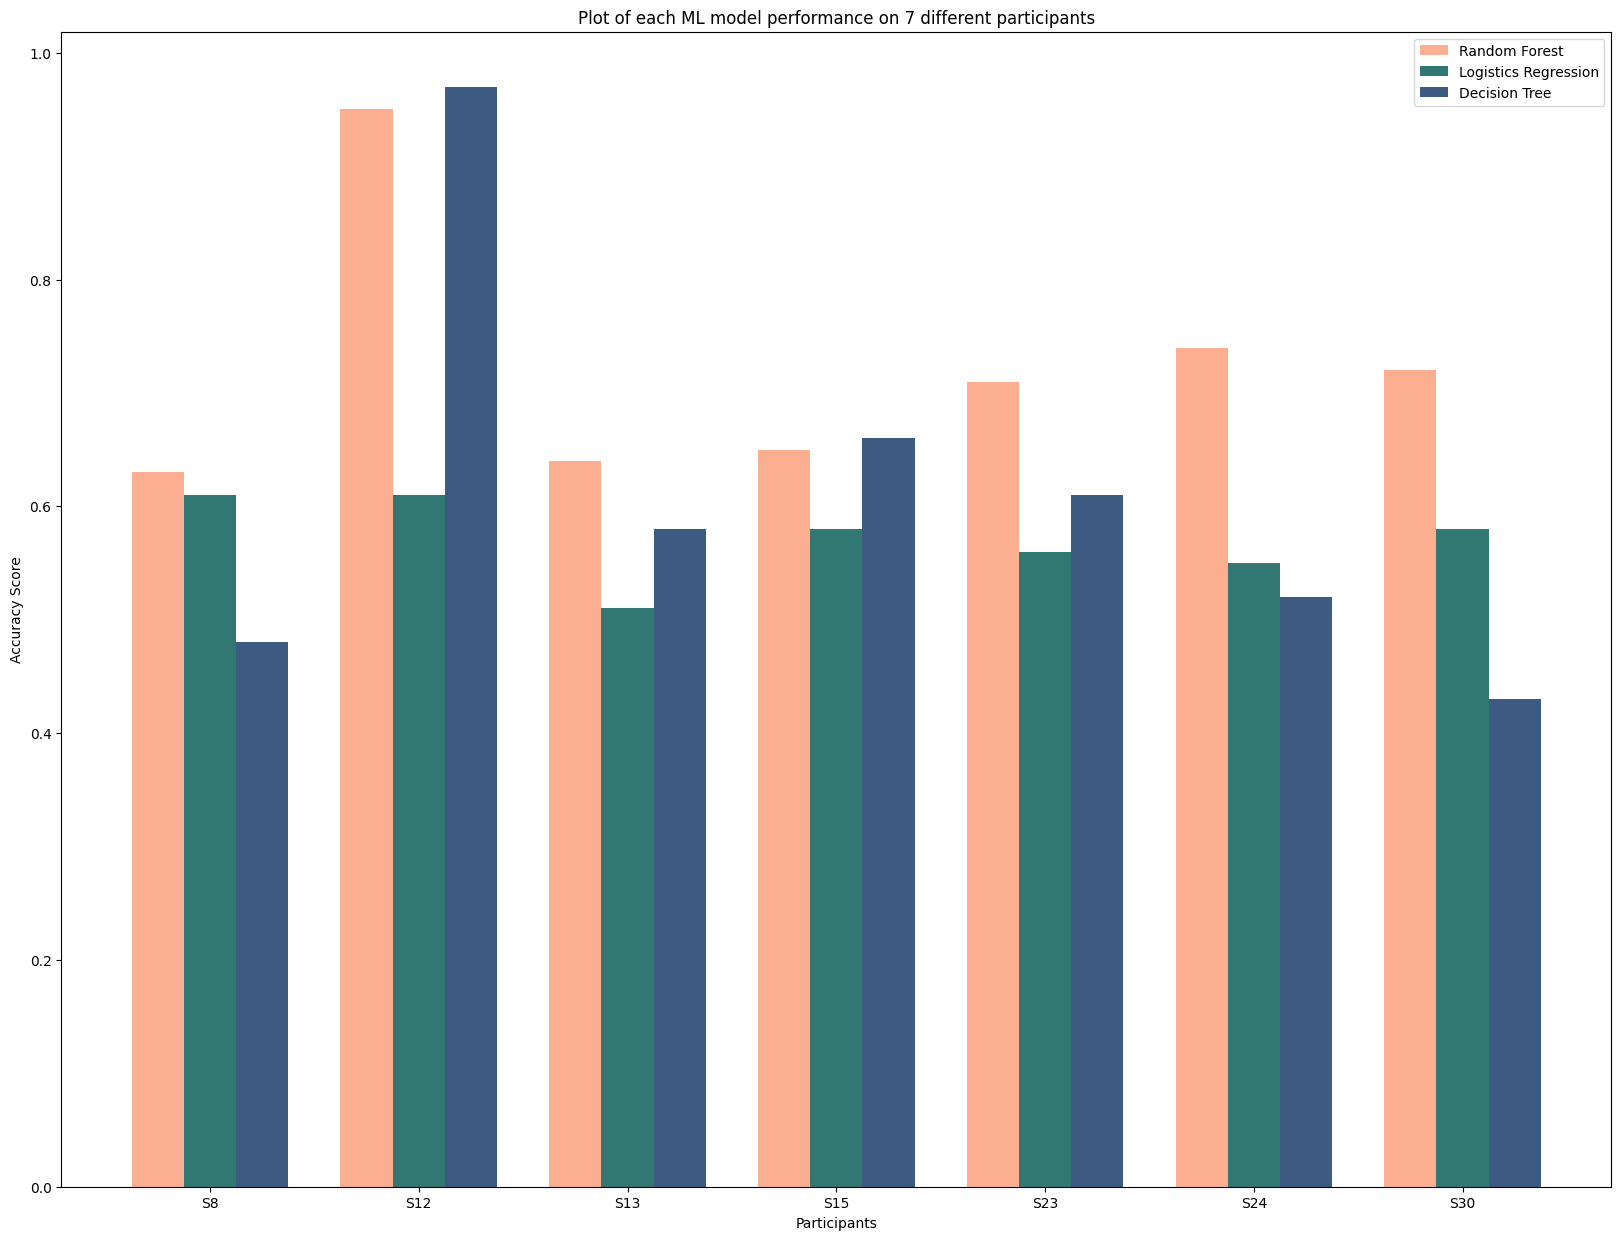

In [55]:
x = acc_score['Person']
rf = acc_score['RF']
lr = acc_score['LR']
dt = acc_score['DT']

x_axis = np.arange(len(x))

bar_width = 0.25
colors = ['#fcae91', '#317873', '#3d5a80']  # Sequential color pattern

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x_axis - bar_width, rf, bar_width, color=colors[0], label='Random Forest')
ax.bar(x_axis, lr, bar_width, color=colors[1], label='Logistics Regression')
ax.bar(x_axis + bar_width, dt, bar_width, color=colors[2], label='Decision Tree')

ax.set_xticks(x_axis)
ax.set_xticklabels(x)
ax.set_xlabel("Participants")
ax.set_ylabel("Accuracy Score")
ax.set_title("Plot of each ML model performance on 7 different participants")
ax.legend()

plt.show()

Plot of the Cross validation Score of each model on the test data

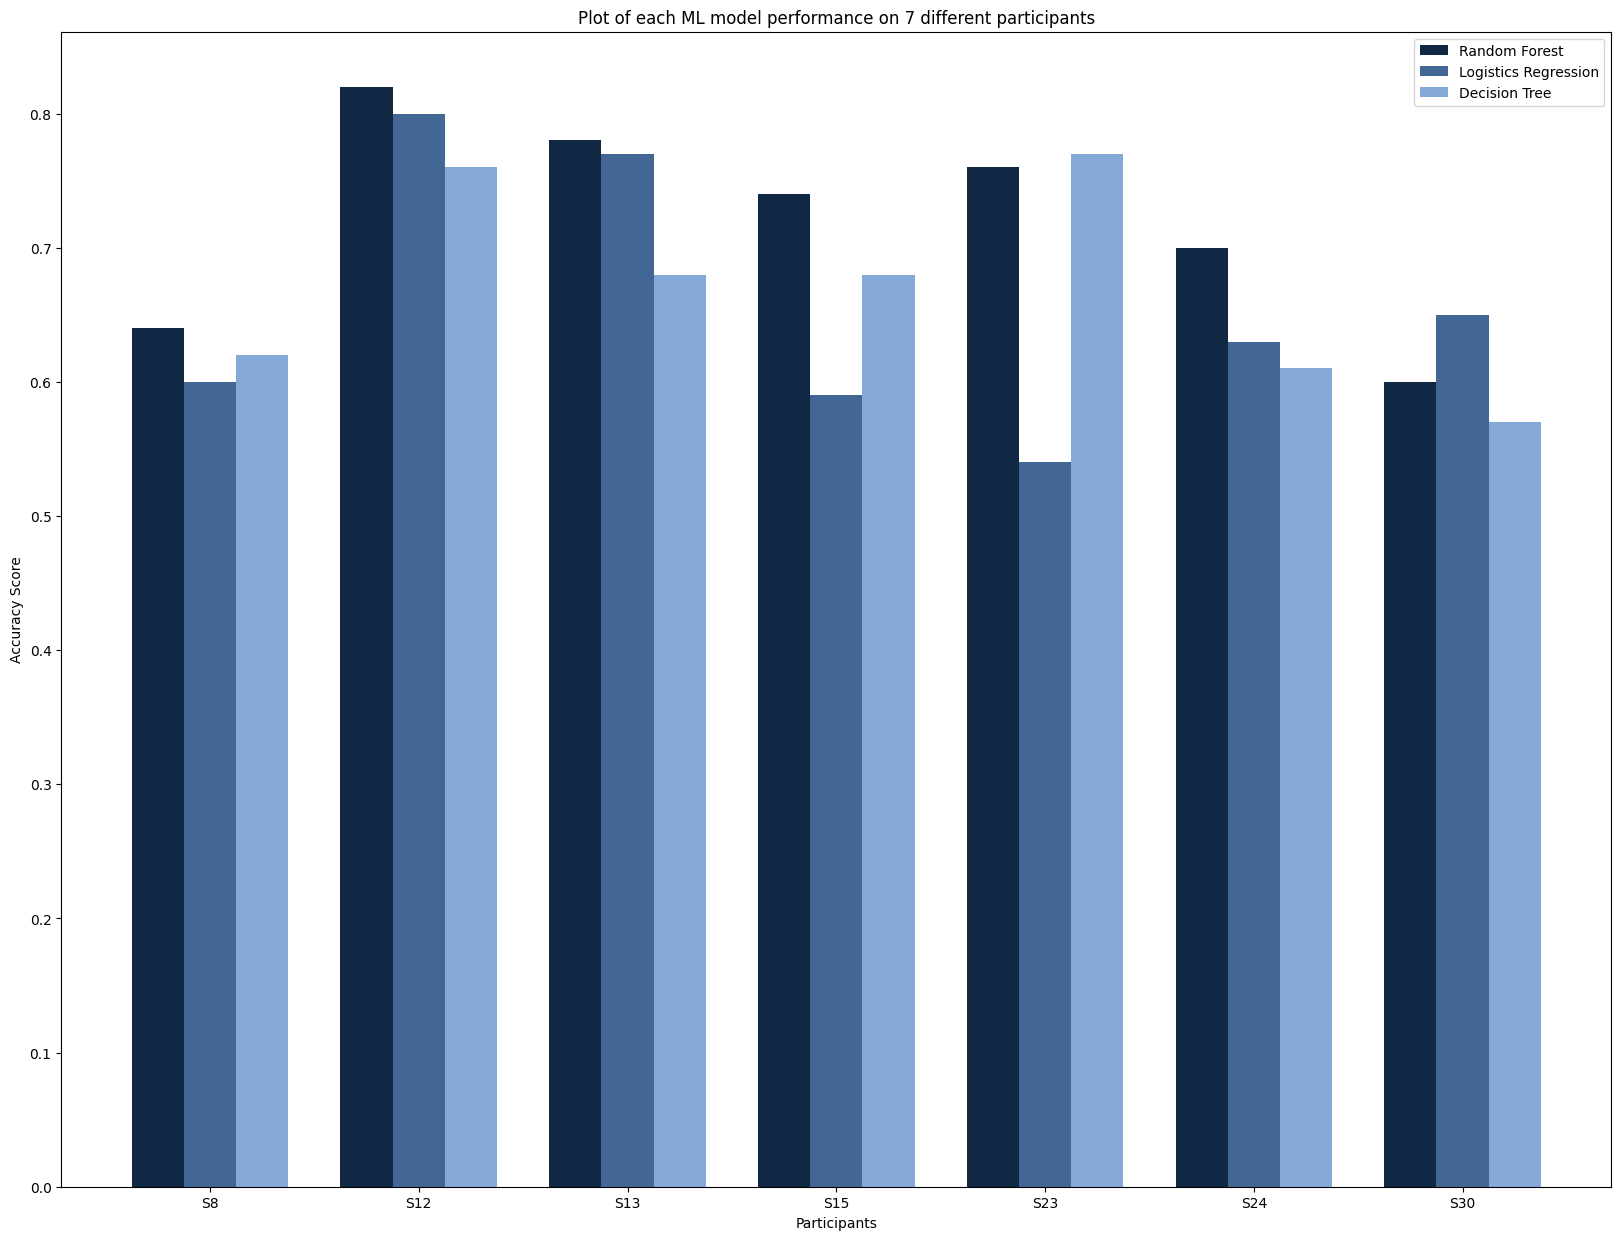

In [56]:
x = cv_score['Person']
rf = cv_score['RF']
lr = cv_score['LR']
dt = cv_score['DT']

x_axis = np.arange(len(x))

bar_width = 0.25
colors = ['#112845', '#436795', '#85aad8']  # Sequential color pattern

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x_axis - bar_width, rf, bar_width, color=colors[0], label='Random Forest')
ax.bar(x_axis, lr, bar_width, color=colors[1], label='Logistics Regression')
ax.bar(x_axis + bar_width, dt, bar_width, color=colors[2], label='Decision Tree')

ax.set_xticks(x_axis)
ax.set_xticklabels(x)
ax.set_xlabel("Participants")
ax.set_ylabel("Accuracy Score")
ax.set_title("Plot of the ML Cross Validation score model of each Model on 7 different participants")
ax.legend()

plt.show()

Creating DataFrame with the False Negative Score

In [57]:
f = {
'Person': ['S8', 'S12', 'S13', 'S15', 'S23', 'S24', 'S30'],
'RF': [231, 87, 2970, 3001, 2790, 1545, 2369],
'LR': [3840, 1922, 4455, 4320, 4320, 4558, 4286],
'DT': [1614, 169, 3105, 2463, 3590, 2072, 3143]
}
fn = pd.DataFrame(f)

In [58]:
fn

,Person,RF,LR,DT
0,S8,231,3840,1614
1,S12,87,1922,169
2,S13,2970,4455,3105
3,S15,3001,4320,2463
4,S23,2790,4320,3590
5,S24,1545,4558,2072
6,S30,2369,4286,3143


Plotting the False Negative value from each model on the test data

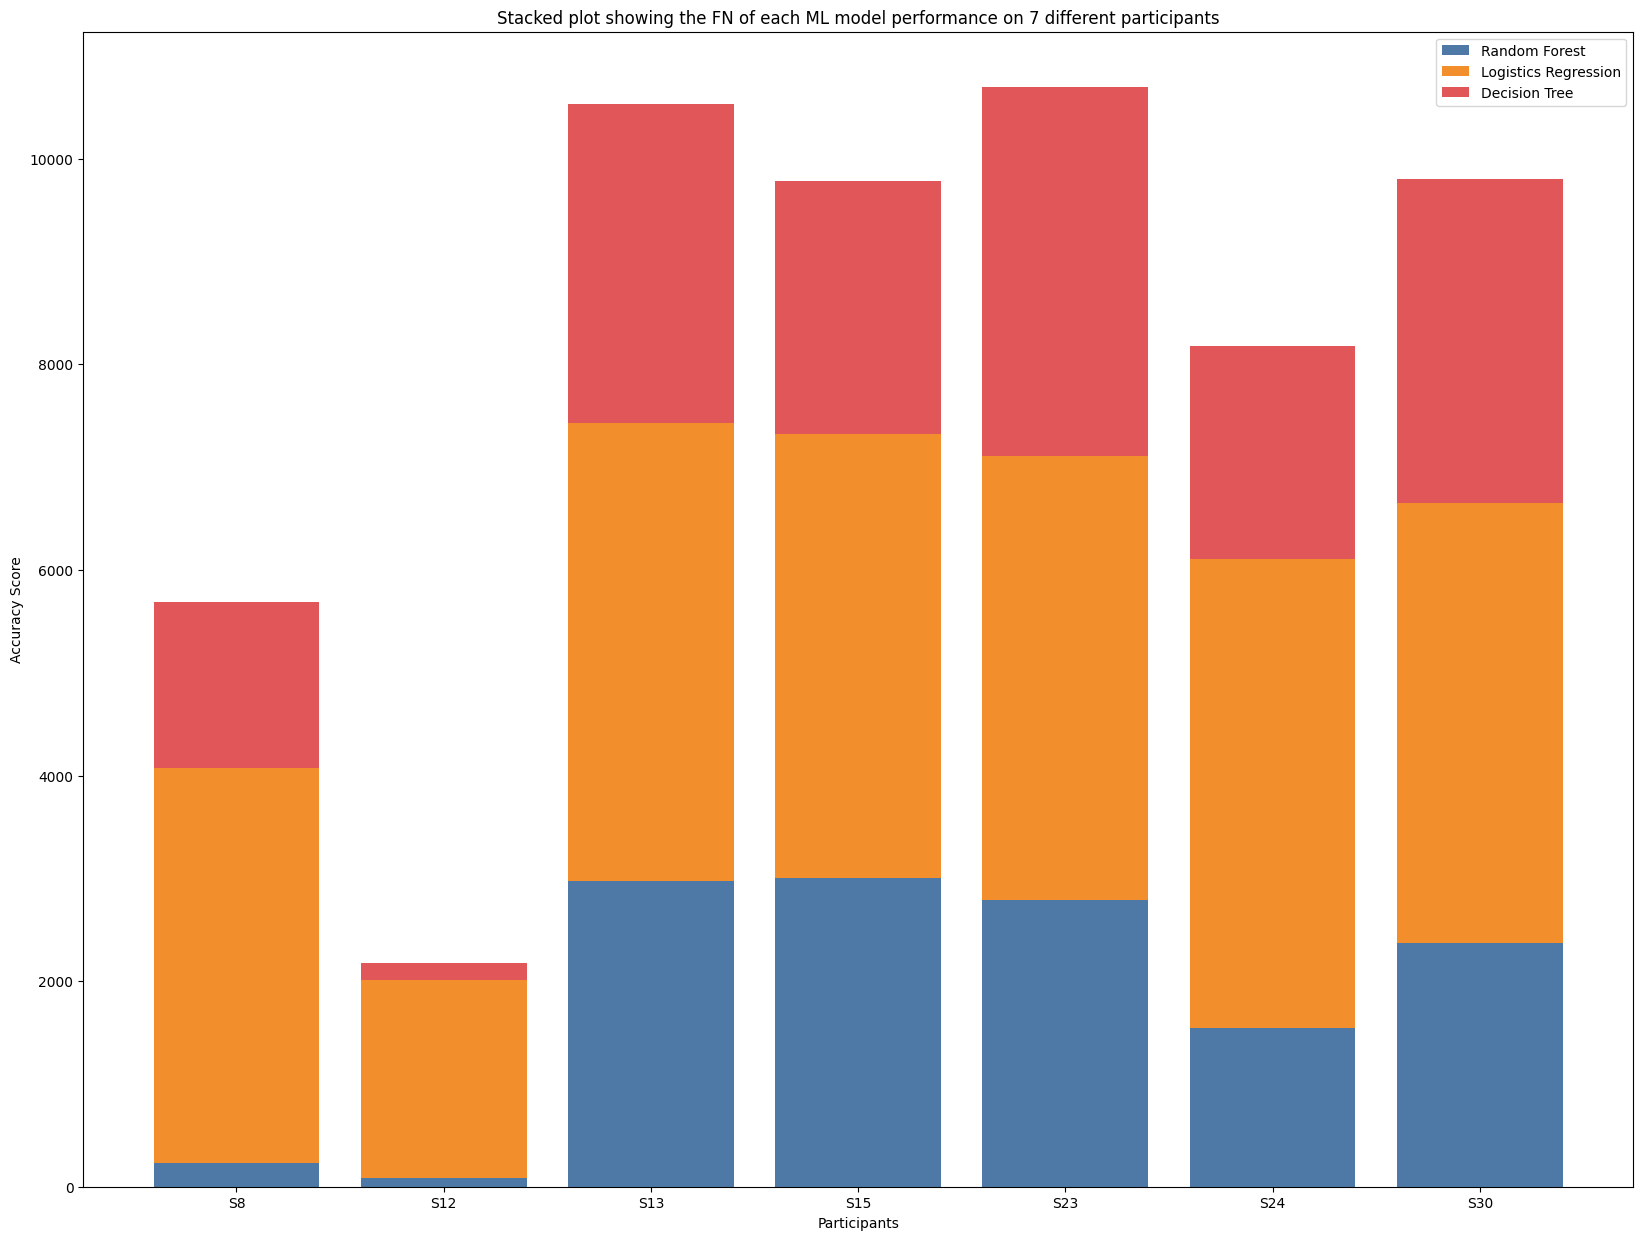

In [59]:
x = fn['Person']
rf = fn['RF']
lr = fn['LR']
dt = fn['DT']

x_axis = np.arange(len(x))

colors = ['#4e79a7', '#f28e2b', '#e15759']  # Professional color scheme

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x_axis, rf, color=colors[0], label='Random Forest')
ax.bar(x_axis, lr, bottom=rf, color=colors[1], label='Logistics Regression')
ax.bar(x_axis, dt, bottom=np.add(rf, lr), color=colors[2], label='Decision Tree')

ax.set_xticks(x_axis)
ax.set_xticklabels(x)
ax.set_xlabel("Participants")
ax.set_ylabel("Accuracy Score")
ax.set_title("Stacked plot showing the FN of each ML model performance on 7 different participants")
ax.legend()

plt.show()

Plotting the False Negative value from each model on the test data

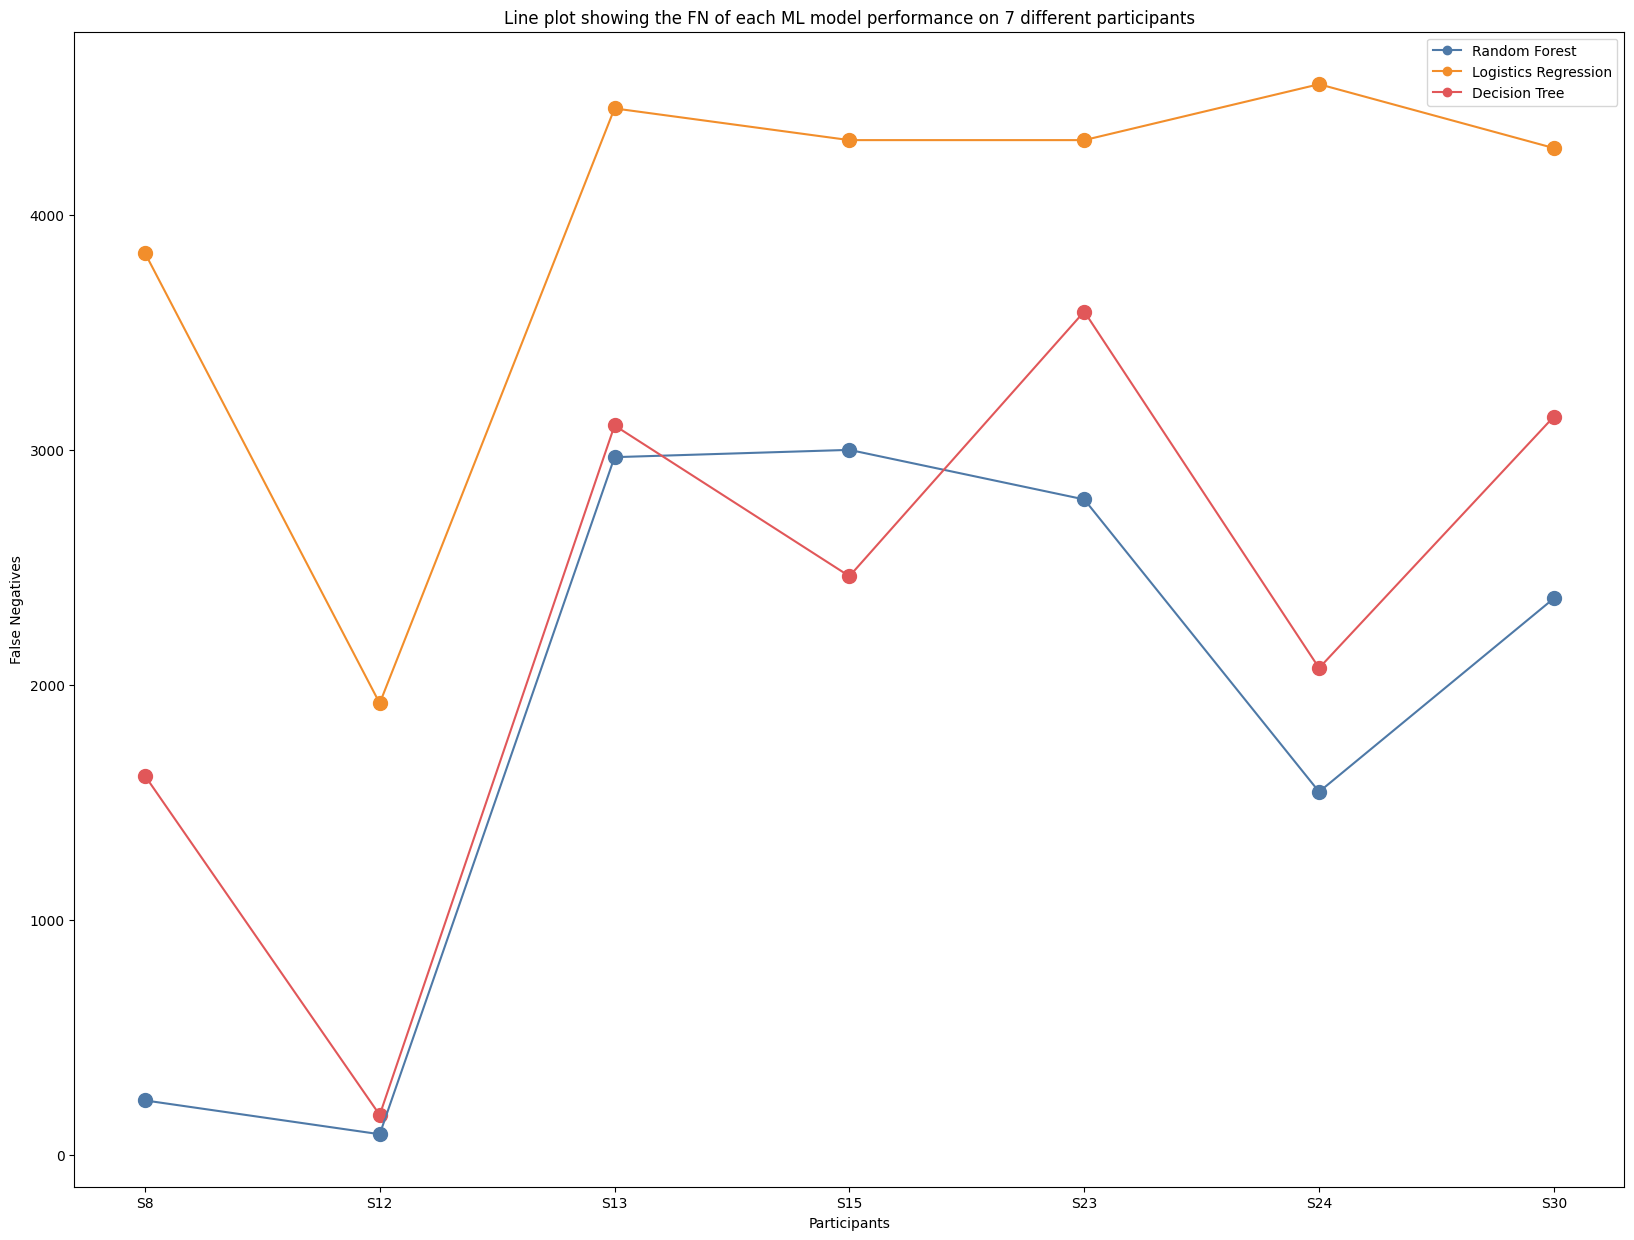

In [60]:
import numpy as np
import matplotlib.pyplot as plt

x = fn['Person']
rf = fn['RF']
lr = fn['LR']
dt = fn['DT']

x_axis = np.arange(len(x))

colors = ['#4e79a7', '#f28e2b', '#e15759']  # Professional color scheme

fig, ax = plt.subplots(figsize=(20, 15))

# Line plots
ax.plot(x_axis, rf, color=colors[0], label='Random Forest', linestyle='-', marker='o')
ax.plot(x_axis, lr, color=colors[1], label='Logistics Regression', linestyle='-', marker='o')
ax.plot(x_axis, dt, color=colors[2], label='Decision Tree', linestyle='-', marker='o')

# Dots on each point
ax.scatter(x_axis, rf, color=colors[0], marker='o', s=100)
ax.scatter(x_axis, lr, color=colors[1], marker='o', s=100)
ax.scatter(x_axis, dt, color=colors[2], marker='o', s=100)

ax.set_xticks(x_axis)
ax.set_xticklabels(x)
ax.set_xlabel("Participants")
ax.set_ylabel("False Negatives")
ax.set_title("Line plot showing the FN of each ML model performance on 7 different participants")
ax.legend()

plt.show()


## Using One participant

A participant was picked at random, the data was splitted, used to train and test a  RF model.

In [123]:
x1_train, y1_train = df3.drop(['Person','Label'], axis=1), df3['Label']

In [124]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth = 6, random_state=42)
rf1.fit(x1_train, y1_train)

rf1_cv_tr_score = cross_val_score(rf1, x1_train, y1_train, cv=5, scoring=make_scorer(acc))
print('Cross-validation score on training data', round(rf1_cv_tr_score.mean(),2))

Cross-validation score on training data 0.56


In [125]:
print('Random Forest Accuracy on Participants')
print('S8 =', round(acc(df8['Label'], rf1.predict(df8.drop(['Person','Label'], axis=1))),2))
print('S12 =', round(acc(df12['Label'], rf1.predict(df12.drop(['Person','Label'], axis=1))),2))
print('S13 =', round(acc(df13['Label'], (rf1.predict(df13.drop(['Person','Label'], axis=1)))),2))
print('S15 =', round(acc(df15['Label'], rf1.predict(df15.drop(['Person','Label'], axis=1))),2))
print('S23 =', round(acc(df23['Label'], rf1.predict(df23.drop(['Person','Label'], axis=1))),2))
print('S24 =', round(acc(df24['Label'], (rf1.predict(df24.drop(['Person','Label'], axis=1)))),2))
print('S30 =', round(acc(df30['Label'], rf1.predict(df30.drop(['Person','Label'], axis=1))),2))

Random Forest Accuracy on Participants
S8 = 0.61
S12 = 0.66
S13 = 0.43
S15 = 0.58
S23 = 0.56
S24 = 0.49
S30 = 0.58


In [126]:
print('The FN of S8 =', confusion_matrix(df8['Label'], rf1.predict(df8.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S12 =', confusion_matrix(df12['Label'], rf1.predict(df12.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S13 =', confusion_matrix(df13['Label'], rf1.predict(df13.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S15 =', confusion_matrix(df15['Label'], rf1.predict(df15.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S23 =', confusion_matrix(df23['Label'], rf1.predict(df23.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S24 =', confusion_matrix(df24['Label'], rf1.predict(df24.drop(['Person','Label'], axis=1)))[1][0])
print('The FN of S30 =', confusion_matrix(df30['Label'], rf1.predict(df30.drop(['Person','Label'], axis=1)))[1][0])

The FN of S8 = 3840
The FN of S12 = 3409
The FN of S13 = 2975
The FN of S15 = 4320
The FN of S23 = 4320
The FN of S24 = 4299
The FN of S30 = 4320
